# Ratings Prediction

Problem Statement:

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps mentioned below:

- Data Cleaning

- Exploratory Data Analysis

- Data Preprocessing

- Model Building

- Model Evaluation

- Selecting the Best ML model

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

c:\akhand\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\akhan\Downloads\Ratings Prediction Project Data (Flip Robo).csv")
df # checking the first five and last five rows of our dataset

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Terrific purchase,I like the specs and scope for expansion. It i...,5
1,1,Not good,Bought this in November. I already hv 20% batt...,2
2,2,Good quality product,pros\n1. Nice metallic design and i love the k...,4
3,3,Brilliant,Would have been better if msi provides 1TB ssd...,5
4,4,Best in the market!,Speed is everything and that MSi gives.\nIt is...,5
...,...,...,...,...
65391,65391,Worth every penny,Good quality product and available at reasonab...,5
65392,65392,Simply awesome,Best value,5
65393,65393,Good quality product,"Nice product. good packing. nice pictire, Unfo...",4
65394,65394,Must buy!,Value for money....\nDecent viewing angles\nId...,5


Column Information:

- Review_title : title of the review

- Review_text : content of the review text

- Ratings : ratings are out of 5 stars

First I will drop the unwanted column "Unnamed: 0" from our dataset as it holds meaning less index information.

# Exploratory Data Analysis

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 65396 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,Terrific purchase,I like the specs and scope for expansion. It i...,5
1,Not good,Bought this in November. I already hv 20% batt...,2
2,Good quality product,pros\n1. Nice metallic design and i love the k...,4
3,Brilliant,Would have been better if msi provides 1TB ssd...,5
4,Best in the market!,Speed is everything and that MSi gives.\nIt is...,5
5,Good quality product,"Guys remember this is a ultra thin notebook, h...",4
6,Poor Design,I have MSI PS42 as well.. working fine for las...,1
7,Very close to AWESOME!!!,"Light weight, easy to handle\nPerformance is g...",4
8,Super!,An amazing laptop . There are only 1 problems\...,5
9,Wonderful,It's great deal for the developer and coders.\...,4


 NaN values that will need to be removed to clean our dataset and make it free from missing values.

In [4]:
df.isna().sum() # checking for missing values

Review_title    0
Review_text     0
Ratings         0
dtype: int64

Now we cofirm that we have missing value in all the column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65396 entries, 0 to 65395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  65396 non-null  object
 1   Review_text   65396 non-null  object
 2   Ratings       65396 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [6]:
df['Ratings'].unique()

array([5, 2, 4, 1, 3], dtype=int64)

So we have all numeric value that will be easy for our model

In [7]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,Terrific purchase,I like the specs and scope for expansion. It i...,5,Terrific purchase I like the specs and scope f...
1,Not good,Bought this in November. I already hv 20% batt...,2,Not good Bought this in November. I already hv...
2,Good quality product,pros\n1. Nice metallic design and i love the k...,4,Good quality product pros\n1. Nice metallic de...
3,Brilliant,Would have been better if msi provides 1TB ssd...,5,Brilliant Would have been better if msi provid...
4,Best in the market!,Speed is everything and that MSi gives.\nIt is...,5,Best in the market! Speed is everything and th...
...,...,...,...,...
65391,Worth every penny,Good quality product and available at reasonab...,5,Worth every penny Good quality product and ava...
65392,Simply awesome,Best value,5,Simply awesome Best value
65393,Good quality product,"Nice product. good packing. nice pictire, Unfo...",4,Good quality product Nice product. good packin...
65394,Must buy!,Value for money....\nDecent viewing angles\nId...,5,Must buy! Value for money....\nDecent viewing ...


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

# Visualizing text in first three rows from the newly created "Review" column

In [8]:
df['Review'][0]

'Terrific purchase I like the specs and scope for expansion. It is a beast and light weight at the same time.\n\nIt has 6 cores, 4gb dedicated graphics, RAM can be expanded to 64gb (going by video in YouTube), it has additional SSD slot, 2 thunderbolt ports, can do matrix display (simultaneous connect 2 monitors). 4 cell battery (can do easily 7-8 hours with good continuous use).\n\nBuild quality is not bad; does not heat up for normal working (software development). I have not played any heavy games though but 2...\nREAD MORE'

In [9]:
df['Review'][1]

"Not good Bought this in November. I already hv 20% battery wear. For that battery capacity. I should be getting 6 hours atleast. Now I I don't even get proper 3 hours.\n\nThe hinge is smooth. And it's also delicate.\n\nThe display is not laminated. So surrounding plastic might be pressing on it and I observed a whitish tint in the corner.\n\nThe performance of the i7 is very good. It's fast laptop. No doubt abt that. The display quality is very good. The colours are vibrant.\n\nThis has a GTX 1650 graphics c...\nREAD MORE"

In [10]:
df['Review'][2]

'Good quality product pros\n1. Nice metallic design and i love the keyboard\n2. Display is good excellent brightness\n3. Battery back is impressive give around 5-6 hours min\n4. Performance is excellent\n\ncons\nthe only con i noticed is that while charging it get pretty heated at upper keyboard portion other than this laptop is awesome.'

# Text Processing to remove unwanted punctuations and special characters

In [11]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [12]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Now vizualize the text after processing

In [13]:
df['Review'][0]

'terrific purchase like specs scope expansion beast light weight time 6 cores 4gb dedicated graphics ram expanded 64gb going video youtube additional ssd slot 2 thunderbolt ports matrix display simultaneous connect 2 monitors 4 cell battery easily 78 hours good continuous use build quality bad heat normal working software development played heavy games though 2 read'

In [14]:
df['Review'][1]

'good bought november already hv 20 battery wear battery capacity getting 6 hours atleast even get proper 3 hours hinge smooth also delicate display laminated surrounding plastic might pressing observed whitish tint corner performance i7 good fast laptop doubt abt display quality good colours vibrant gtx 1650 graphics c read'

# Lemmatization

In [15]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [16]:
df['Review'][0]

'terrific purchase like specs scope expansion beast light weight time 6 core 4gb dedicated graphic ram expand 64gb go video youtube additional ssd slot 2 thunderbolt port matrix display simultaneous connect 2 monitor 4 cell battery easily 78 hour good continuous use build quality bad heat normal work software development play heavy game though 2 read'

In [17]:
df['Review'][1]

'good buy november already hv 20 battery wear battery capacity get 6 hour atleast even get proper 3 hour hinge smooth also delicate display laminate surround plastic might press observed whitish tint corner performance i7 good fast laptop doubt abt display quality good colour vibrant gtx 1650 graphic c read'

# Text Normalization - Standardization

In [18]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [19]:
df['Review'][0]

'terrific purchase like specs scope expansion beast light weight time  core gb dedicated graphic ram expand gb go video youtube additional ssd slot  thunderbolt port matrix display simultaneous connect  monitor  cell battery easily  hour good continuous use build quality bad heat normal work software development play heavy game though  read'

In [20]:
df['Review'][1]

'good buy november already hv  battery wear battery capacity get  hour atleast even get proper  hour hinge smooth also delicate display laminate surround plastic might press observed whitish tint corner performance i good fast laptop doubt abt display quality good colour vibrant gtx  graphic c read'

# Word Counts

In [21]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,56,terrific purchase like specs scope expansion b...
1,50,good buy november already hv battery wear bat...
2,39,good quality product pro nice metallic design...
3,12,brilliant would better msi provide tb ssd inst...
4,10,best market speed everything msi give one best...
5,54,good quality product guy remember ultra thin n...
6,36,poor design msi ps well work fine last year m...
7,30,close awesome light weight easy handle perform...
8,12,super amaze laptop problem sound quality goo...
9,25,wonderful great deal developer coder love disp...


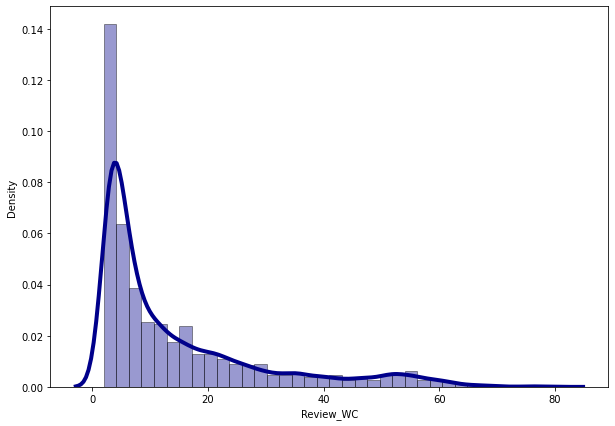

In [22]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 40. But some of the reviews are too lengthy which may act like outliers in our data.

# Character Counts

In [23]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,341,terrific purchase like specs scope expansion b...
1,298,good buy november already hv battery wear bat...
2,241,good quality product pro nice metallic design...
3,78,brilliant would better msi provide tb ssd inst...
4,56,best market speed everything msi give one best...
5,339,good quality product guy remember ultra thin n...
6,184,poor design msi ps well work fine last year m...
7,193,close awesome light weight easy handle perform...
8,62,super amaze laptop problem sound quality goo...
9,181,wonderful great deal developer coder love disp...


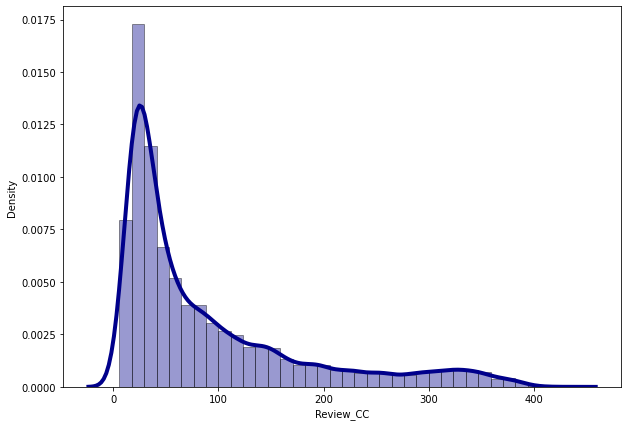

In [24]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

# Removing Outliers

In [25]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 64305 Rows and 6 Columns in our dataframe after removing outliers


As we know that some of the review are too lengthy I am removing those reviews from the data as outliers using Z score method. By removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

# Visualization

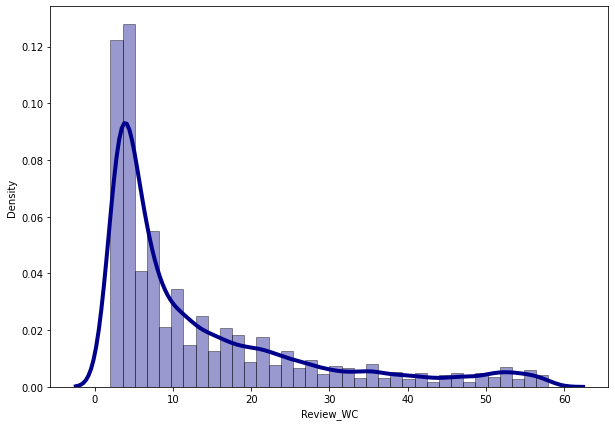

In [26]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

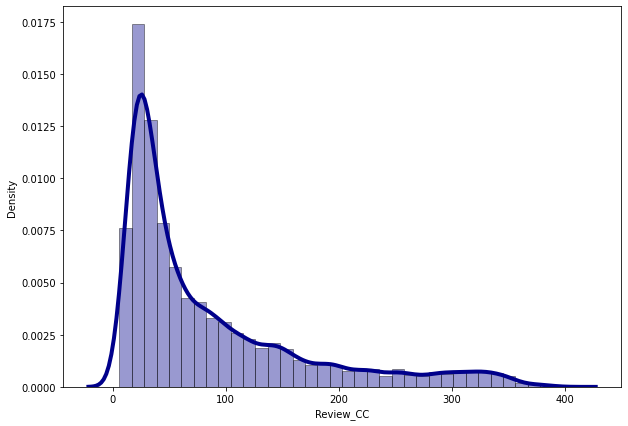

In [27]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram+distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

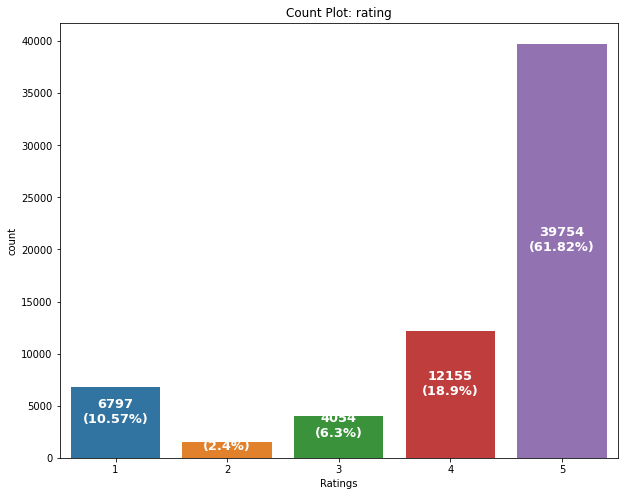

In [28]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

Observation:

- We can see that the highest number of customer rating received are for 5 stars

- Then we have 4 star rating reviews present in our dataset

- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

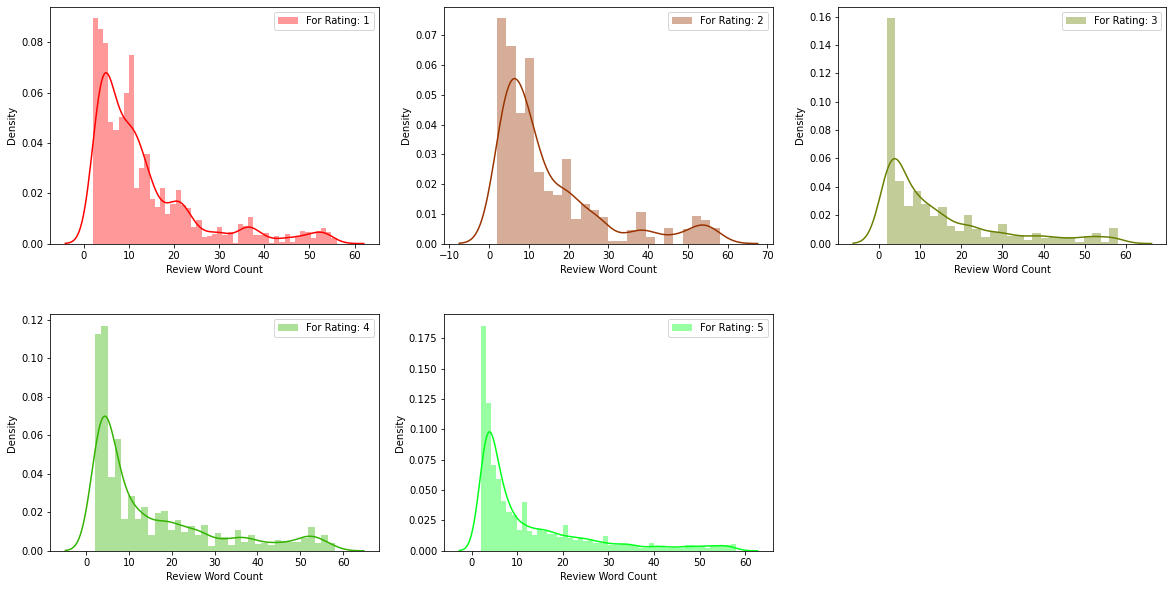

In [29]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: The above word count histogram+distributions for each and every rating shows that when people are disappointed with a service they tend to mention a discriptive review as compared to when they are happy they use lesser words to express the joy of having got a great product.

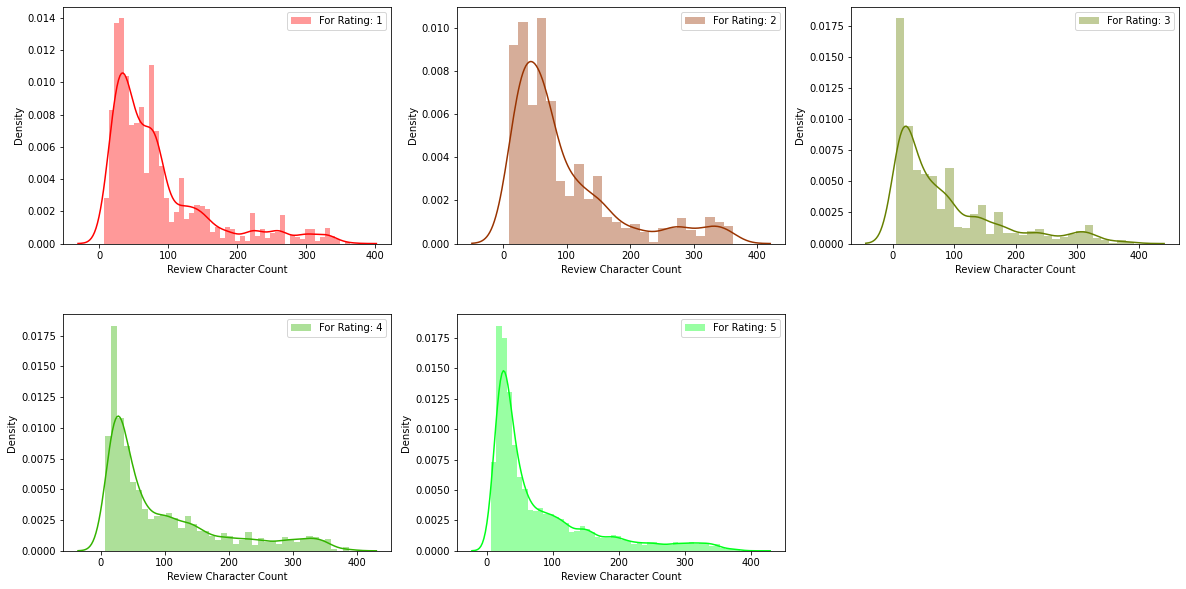

In [30]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

Observation: Just as in the case of word count histogram+distribution plots the pattern is quite evident that Rating 5 reviews have lesser character counts on their comments when compared to the lower rating details.

# Displaying loud words with Word Cloud information

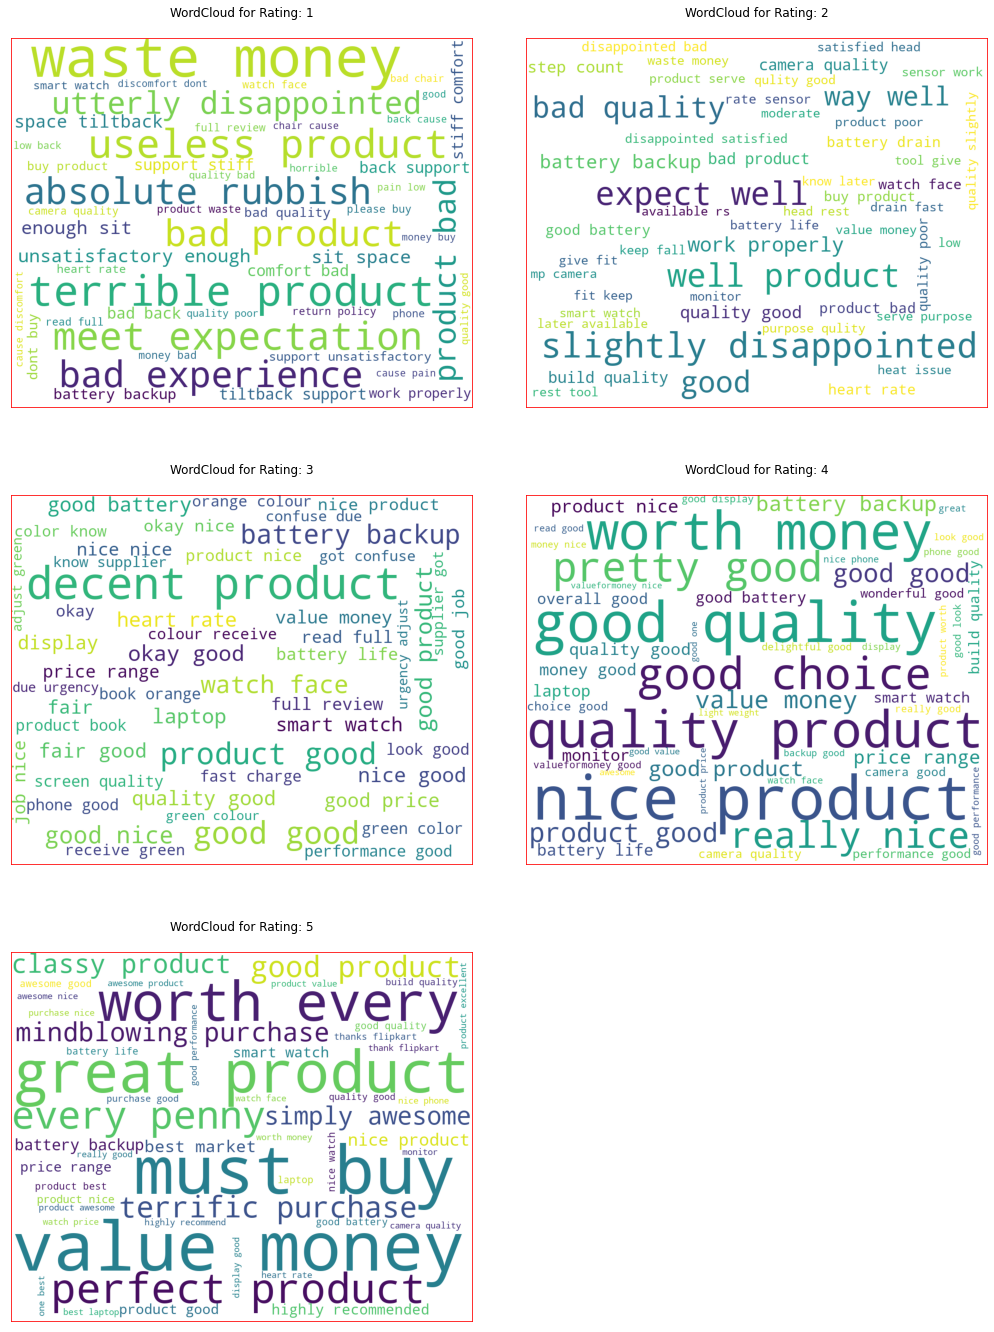

In [31]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

Observation:

For Rating: 1

- It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

For Rating: 2

- It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

For Rating: 3

- It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

For Rating: 4

- It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

For Rating: 5

- It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    39754
4    12155
1     6797
3     4054
2     1545
Name: Ratings, dtype: int64


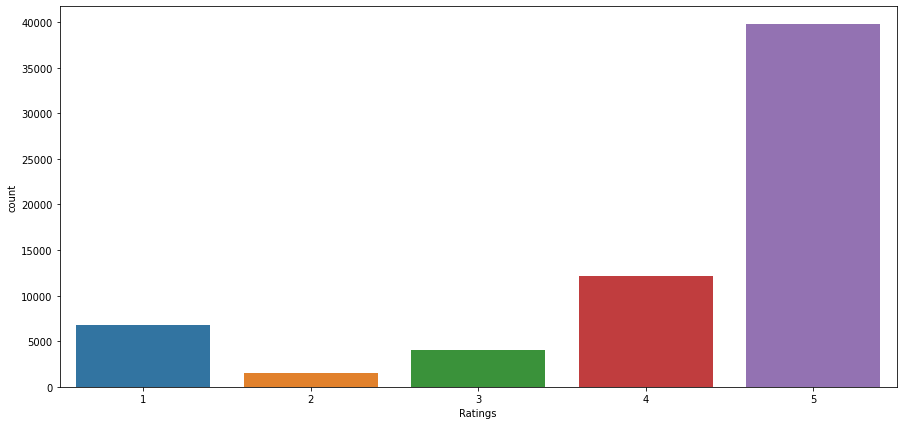

In [32]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Observation:

- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.

- Which will cause the Imbalance problem for our Machine Learning model and make it bias.

- So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness

In [33]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df


,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Great Budget IPS Monitor,Excellent IPS monitor for the price. Thanks to...,5,great budget ip monitor excellent ip monitor p...,55,344
1,Wonderful,Best laptop in this price range,5,wonderful best laptop price range,5,33
2,Bad quality,Not good,2,bad quality good,3,16
3,Highly recommended,Awesome picture quality......I got it for 8464...,5,highly recommended awesome picture qualityi ge...,11,78
4,Don't waste your money,After updating the software it is not counting...,1,waste money update software count step properly,7,47
...,...,...,...,...,...,...
64300,Great product,The watch is best according to it's price.It i...,5,great product watch best accord priceit value ...,24,146
64301,Terrific purchase,It's a good,5,terrific purchase good,3,22
64302,Could be way better,Ok type watch not good,2,could way well ok type watch good,7,33
64303,Horrible,Worst product.. Always facing hardware issue. ...,1,horrible bad product always face hardware issu...,25,141


In [34]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Terrible product,Totally disappointed. Activity tracker is a di...,1,terrible product totally disappointed activity...,37,245
1,Decent product,Value for money,3,decent product value money,4,26
2,Decent product,"Strap is too weak; inaccuracy of sensors, this...",3,decent product strap weak inaccuracy sensor wa...,27,170
3,Decent product,Heating is an issue actually!!!,3,decent product heat issue actually,5,34
4,Best in the market!,Good,5,best market good,3,16
...,...,...,...,...,...,...
27103,Did not meet expectations,Calling feature worked only for 1 week after t...,1,meet expectation call feature work week eon p...,15,89
27104,Excellent,Till now there isnt any problem\none thing to ...,5,excellent till isnt problem one thing remember...,26,175
27105,Value-for-money,Large Screen. Superb experience after doing th...,4,valueformoney large screen superb experience w...,17,131
27106,Really Nice,Nice 👍👍,4,really nice nice,3,16


5    7356
4    7356
1    6797
3    4054
2    1545
Name: Ratings, dtype: int64


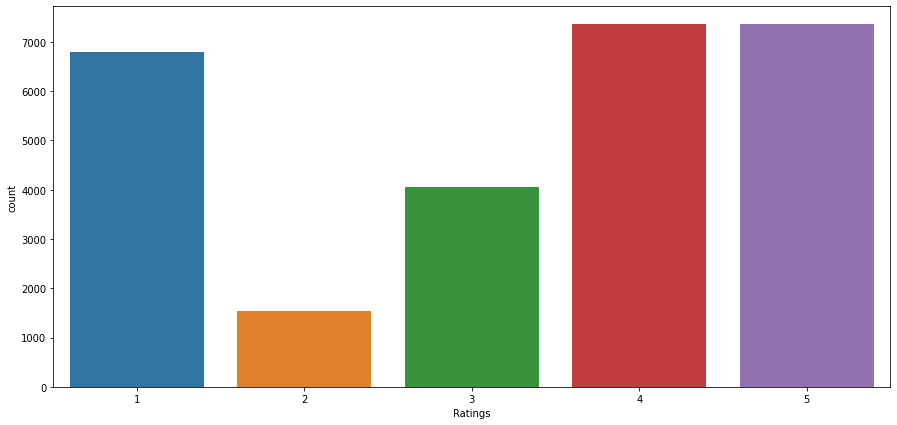

In [35]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Somewhat data is balanced

# Top 30 most frequently occuring words

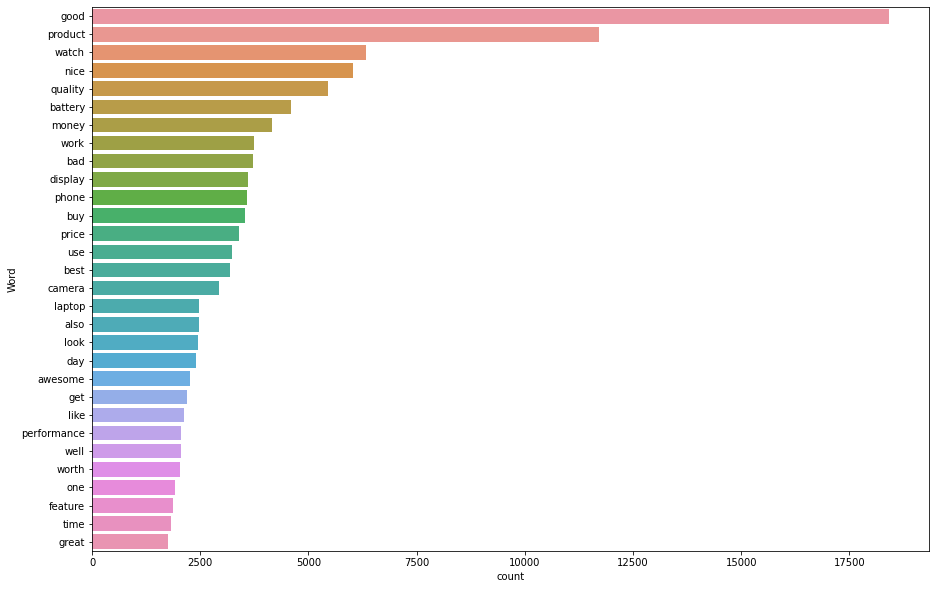

In [36]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])   

# Top 30 rarely occuring words

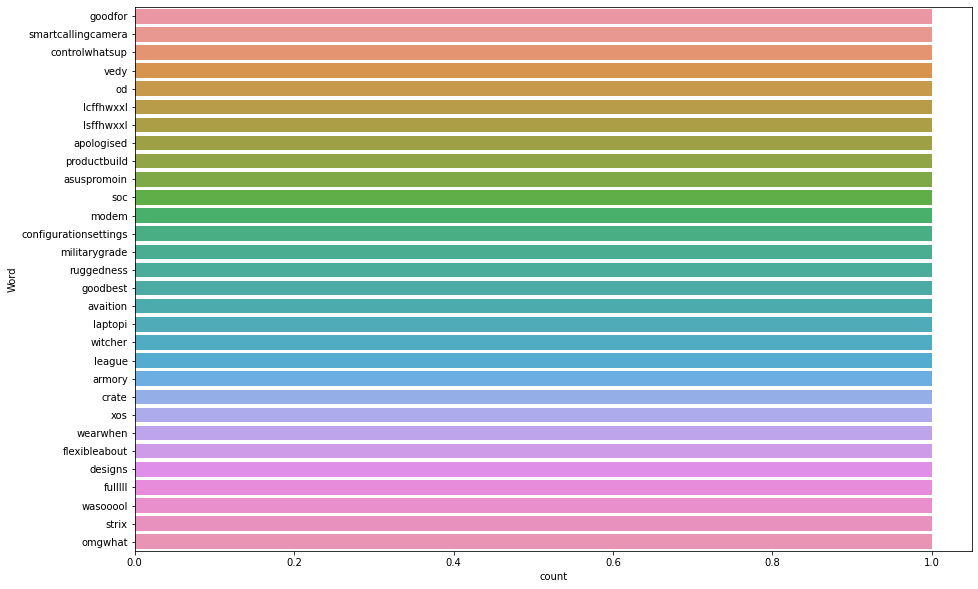

In [37]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])    

# Model Building and Evaluation Metrics

In [38]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

# Converting text into vectors using TfidfVectorizer

In [39]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

Splitting the data into train and test datasets

In [40]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (18975, 150000)
x_test (8133, 150000)
y_train (18975,)
y_test (8133,)


In [41]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

# Training and testing of all the classification algorithms

In [42]:
for model in [lr,svc,bnb,mnb,sgd,rf,xgb,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 97.68842985368252
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      2037
           2       1.00      0.96      0.98       437
           3       0.98      0.97      0.97      1206
           4       0.95      0.97      0.96      2241
           5       0.98      0.97      0.98      2212

    accuracy                           0.98      8133
   macro avg       0.98      0.97      0.98      8133
weighted avg       0.98      0.98      0.98      8133

CONFUSION MATRIX: 
 [[2032    0    0    5    0]
 [   9  418    1    9    0]
 [   2    0 1173   27    4]
 [   0    0   27 2183   31]
 [   2    1    2   68 2139]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURAC

We can see that the accuracy scores for LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms are all above 80% range and we shall cross validate them to choose the best scored classification algorithm amongst them.

# Cross validation score for best score models

In [43]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf,lgb,xgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 97.74974177364616


******************************LinearSVC******************************
Cross validation score: 98.28095027298215


******************************SGDClassifier******************************
Cross validation score: 98.02641286705031


******************************RandomForestClassifier******************************
Cross validation score: 97.9932123358418


******************************LGBMClassifier******************************
Cross validation score: 98.56131031429837


******************************XGBClassifier******************************
Cross validation score: 98.57606610594658




In the above cell we cross validated the LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier, XGBClassifier and LGBMClassifier algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. I pick RandomForestClassifier  for further tuning the accuracy percentage.

# HyperParameter Tuning

In [44]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.972 total time= 1.1min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.973 total time= 1.1min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.969 total time= 1.1min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.972 total time= 3.2min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.974 total time= 2.4min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.972 total time= 2.3min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.971 total time= 1.3min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.973 total time= 1.3min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [45]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 500,
 'n_estimators': 200}

In [46]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 98.06959301610722

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2037
           2       1.00      0.99      0.99       437
           3       0.97      0.98      0.97      1206
           4       0.97      0.97      0.97      2241
           5       0.98      0.98      0.98      2212

    accuracy                           0.98      8133
   macro avg       0.98      0.98      0.98      8133
weighted avg       0.98      0.98      0.98      8133


CONFUSION MATRIX: 
 [[2033    0    0    0    4]
 [   2  433    0    2    0]
 [   2    2 1176   15   11]
 [   1    0   32 2170   38]
 [   0    0    1   47 2164]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

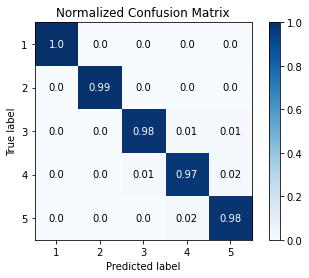

In [47]:
S# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

# Saving the best model

In [48]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

# Loading the final model